In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from gensim.summarization import keywords

%matplotlib inline

In [12]:
df = pd.read_csv('clickbait/clickbait_data.csv')

### Check for missing values

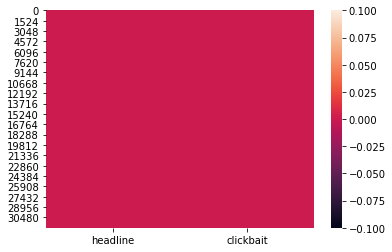

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


### Check balance in dataset

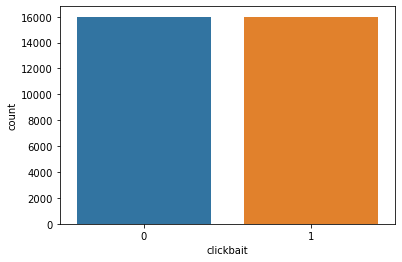

In [15]:
sns.countplot(df['clickbait'])

Hence dataset seems well balanced

## Word Cloud for Clickbait and Non-Clickbait headlines

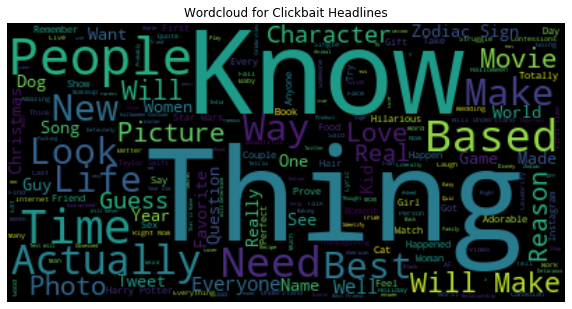

In [16]:
#text = df[df['clickbait'==1]]['headline']
clickbait_text = ' '.join(headline for headline in df[df['clickbait']==1]['headline'])
#print('Text: '+ text)
wCloud_clickbait = WordCloud().generate(clickbait_text)
plt.figure(figsize = (10,8))
plt.axis('off')
plt.title('Wordcloud for Clickbait Headlines')
plt.imshow(wCloud_clickbait, interpolation = 'bilinear')

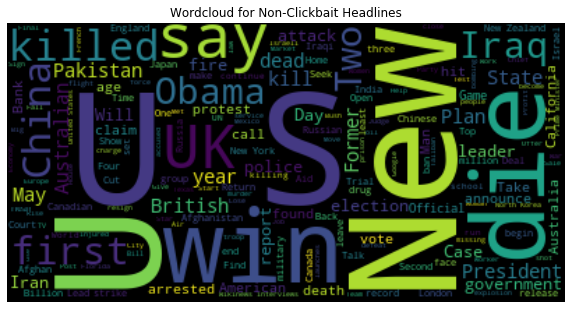

In [17]:
#text = df[df['clickbait'==1]]['headline']
nonClickbait_text = ' '.join(headline for headline in df[df['clickbait']==0]['headline'])
#print('Text: '+ text)
wCloud_nonClickbait = WordCloud().generate(nonClickbait_text)
plt.figure(figsize = (10,8))
plt.axis('off')
plt.title('Wordcloud for Non-Clickbait Headlines')
plt.imshow(wCloud_nonClickbait, interpolation = 'bilinear')

This shows that:
* Clickbait headlines tend to have provocative words such as 'actually', 'guess',etc. These words are used to make the reader curious to know more.
* Non clickbait headlines seem to have more proper nouns such as 'Obama', 'Iraq' and words that deal only with facts. Generally these words have some political relevance.

### Some keywords extracted from the two kinds of headlines

In [18]:
nonClickbait_keywords = keywords(nonClickbait_text,words = 20)
clickbait_keywords = keywords(clickbait_text,words = 20)

In [19]:
print("20 Clickbait keywords:\n ",clickbait_keywords)

20 Clickbait keywords:
  times
time
timing
things
thing
people
new
news
reasons
reason
reasonable
look
looking
looked
looks
actually
actual
best
hilarious
hilariously
hilary
way
ways
photo
photos
character
characters
like
likes
liked
liking
likely
life
pictures
picture
pictured
movies
movie
love
loves
lovely
loved
loving
celebrity
celebrities
celebrated
celebrate
celebration
celebrations
celebrates
celebrating
tweets
tweet
tweeted
tweeting
girls
girl


In [20]:
print('20 Non Clickbait keywords:\n ', nonClickbait_keywords)

20 Non Clickbait keywords:
  new
news
dies
died
wins
win
winning
kills
killed
killings
killing
kill
says
saying
sai
president
presidency
presidents
obama
obamas
australian
australians
report
reported
reporting
reporter
reports
reporters
british
elections
election
elected
elects
elect
plans
plan
planned
planning
state
states
china
police
policing
protest
protests
protesters
protester
protesting
bomb
bombings
bombs
bombing
bombed
announces
announced
announce
announcers
announcing
announcement
leader
leaders
iraq


In [23]:
df[df['clickbait']==1]

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
15994,"There Was A Mini ""Sisterhood Of The Traveling ...",1
15995,21 Dogs Who Are Thankful For Their Best Friends,1
15996,People Are Proving No Dick Is Too Big By Dropp...,1
15997,"I'm An Atheist, But I'm Not",1
